In [1]:
# Importamos as librerías necesarias
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import mpl_toolkits.mplot3d.axes3d as axes3d
import random
%matplotlib notebook

mCoords = [(0.08614901542, 0.34137302707), (0.086144737762, 0.322617202797), (0.081599283217, 0.305344475524), 
 (0.076144737762, 0.286253566434), (0.073417465035, 0.266253566434), (0.07796291958, 0.248071748252), 
 (0.083417465035, 0.228071748252), (0.086144737762, 0.207162657343), (0.092508374126, 0.183526293706), 
 (0.096144737762, 0.154435384615), (0.097053828671, 0.123526293706), (0.09796291958, 0.101708111888), 
 (0.098872010494, 0.074435384615), (0.09796291958, 0.04988993007), (0.09887201049, 0.032617202797)]

x_oldCoords, y_oldCoords = [], []

for i in range(len(mCoords)):
    x_oldCoords.append(mCoords[i][1])
    y_oldCoords.append(mCoords[i][0]/2)

# Datos sacados da tarefa 3 e 4

vol_ext = 0.0016912439360     # volume exterior para h=0.005m
vol_int = 0.0013092623249     # volume interior para h=0.005m
vol_int2 = 0.00130926
h       = 0.005               # grosor definido para as paredes
rst_sup = 0.08614901542/2     # radio da sección transversal superior (sacado de mCoords/2)
rst_inf = 0.09887201049/2     # radio da sección transversal inferior (sacado de mCoords/2)
altura  = 0.3142              # altura (sacada de mCoords)
base    = 0.032617202797      # altura á que se atopa a base
max_c   = 0.0454              # radio da sección máxima central
h_tan   = 0.098872010494      # altura da sección máxima central

In [2]:
# Inicialmente pídese a creación de 2 novos dexeños, pero debido a que algúns deles non
# son usables na realidade, crearemos polo menos 4 e escolleremos os que poidan servirnos.

# O procedemento será crear un polinómio xenérico e facer un sistema para atopar a curva
# este sistema virá restrinxido pola integral do volume, o radio superior e o radio inferior

# Definimos os símbolos que usaremos
a, b, c, d, x, r, Θ, z  = sp.symbols('a b c d x r Θ z', real=True)

# Creamos as curva xenéricas (de grado 2 e 3) para así evitar as
# figuras que se cerran no centro e que non se axustan á realidade

curva_g2, curva_g3 = a*x**2 + b*x + c, a*x**3 + b*x**2 + c*x + d
f_g2, f_g3 = sp.Lambda(x, curva_g2), sp.Lambda(x, curva_g3)

# Restricción 1, volume tendo en conta a altura
r1_g2 = sp.Eq(sp.integrate(1*r, (r, 0, f_g2(z)), (Θ, 0, 2*np.pi), (z, 0, altura)), vol_int)
r1_g3 = sp.Eq(sp.integrate(1*r, (r, 0, f_g3(z)), (Θ, 0, 2*np.pi), (z, 0, altura)), vol_int)

# Restricción 2, radio superior
r2_g2 = sp.Eq(f_g2(altura), rst_sup)
r2_g3 = sp.Eq(f_g3(altura), rst_sup)
    
# Restricción 3, radio inferior
r3_g2 = sp.Eq(f_g2(0), rst_inf)
r3_g3 = sp.Eq(f_g3(0), rst_inf)

# Restricción 4, máximo central
r4_g3 = sp.Eq(sp.diff(f_g3(x), x).subs(x, h_tan), 0)

# Resolvemos os sistemas de ecuacións
sol_g2 = sp.solve((r3_g2, r2_g2, r1_g2), (a,b,c))
sol_g3 = sp.solve((r4_g3, r3_g3, r2_g3, r1_g3), (a,b,c,d))

# Creamos os polinómios cos resultados das ecuacións
# - Usamos un try para evitar fallos nas probas

try: 
    def f_g2(x):
        return float(sol_g2[0][0])*x**2 + float(sol_g2[0][1])*x + float(sol_g2[0][2])

    def g_g2(x):
        return float(sol_g2[1][0])*x**2 + float(sol_g2[1][1])*x + float(sol_g2[1][2])
    
    def f_g3(x):
        return float(sol_g3[0][0])*x**3 + float(sol_g3[0][1])*x**2 + float(sol_g3[0][2])*x + float(sol_g3[0][3])

    def g_g3(x):
        return float(sol_g3[1][0])*x**3 + float(sol_g3[1][1])*x**2 + float(sol_g3[1][2])*x + float(sol_g3[1][3])
    
    display(sol_g2)
    print('Volume f_g2(x): ', sp.integrate(1*r, (r,0,f_g2(z)), (Θ,0,2*np.pi), (z, 0, altura))*10**6, 'cm3')
    print('Volume g_g2(x): ', sp.integrate(1*r, (r,0,g_g2(z)), (Θ,0,2*np.pi), (z, 0, altura))*10**6, 'cm3')
    
    display(sol_g3)
    print('Volume f_g3(x): ', sp.integrate(1*r, (r,0,f_g3(z)), (Θ,0,2*np.pi), (z, 0, altura))*10**6, 'cm3')
    print('Volume g_g3(x): ', sp.integrate(1*r, (r,0,g_g3(z)), (Θ,0,2*np.pi), (z, 0, altura))*10**6, 'cm3')

except:
    print('Non hai solucións')

[(0.617937185392757, -0.214402513984586, 0.0494360052450000),
 (4.06748502573551, -1.29825044542028, 0.0494360052450000)]

Volume f_g2(x):  1309.26232490000 cm3
Volume g_g2(x):  1309.26232490011 cm3


[(-26.8972763799875, 15.8538835696666, -2.34619363215780, 0.0494360052450000),
 (-6.55486999700630, 3.73210584640244, -0.545766791182571, 0.0494360052450000)]

Volume f_g3(x):  1309.26232490153 cm3
Volume g_g3(x):  1309.26232490009 cm3


<IPython.core.display.Javascript object>


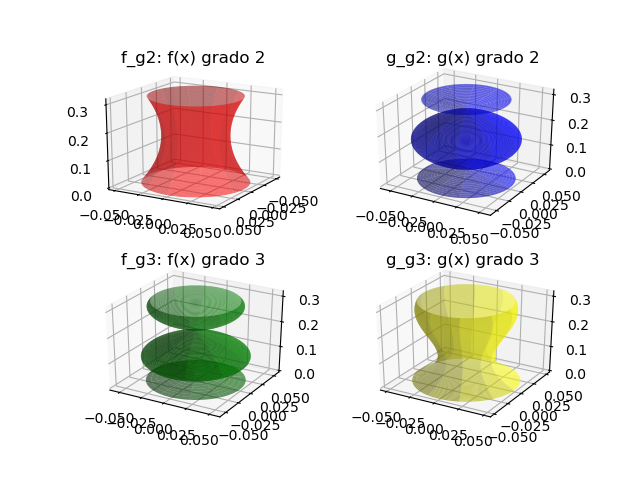

In [8]:
# Facemos a representación gráfica das figuras
fig = plt.figure()

# Xeramos un vector de 800 números entre ó 0 e a altura
u = np.linspace(0, altura, 800)

# Xeramos un vector de 60 números entre ó 0 e ó 2 pi. E convertímolos nunha matriz
v = np.linspace(0, 2*np.pi, 60)
U, V = np.meshgrid(u, v)

# De aquí en diante representaremos os xarróns resultantes
# nunha matriz 2x2 grazas ao add_subplot()

# Representación de f_g2(x)
ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.set_title('f_g2: f(x) grado 2')
xf = U
yf, zf = f_g2(xf)*np.cos(V), f_g2(xf)*np.sin(V)

ax.plot_surface(yf, zf, xf, alpha=0.6, color='red', rstride=6, cstride=6)


# Representación de g_g2(x) 
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.set_title('g_g2: g(x) grado 2')
xg = U
yg, zg = g_g2(xg)*np.cos(V), g_g2(xg)*np.sin(V)

ax2.plot_surface(yg, zg, xg, alpha=0.6, color='blue', rstride=6, cstride=6)


# Representación de f_g3(x)
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax3.set_title('f_g3: f(x) grado 3')
xf = U
yf, zf = f_g3(xf)*np.cos(V), f_g3(xf)*np.sin(V)

ax3.plot_surface(yf, zf, xf, alpha=0.6, color='green', rstride=6, cstride=6)


# Representación de g_g3(x)
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
ax4.set_title('g_g3: g(x) grado 3')
xg = U
yg, zg = g_g3(xg)*np.cos(V), g_g3(xg)*np.sin(V)

ax4.plot_surface(yg, zg, xg, alpha=0.6, color='yellow', rstride=6, cstride=6)

In [7]:
# Das catro simulacións feitas anteriormente quedarémonos con f_g2 e g_g3, as únicas que se poderían
# axustar á realidade por non ter picos intermedios, imposibilitando así o seu uso como xarrón

# Volume do material no obxecto antigo
print('Volume do material xarrón antigo:            ', vol_ext*10**6-vol_int*10**6, '     cm3')

# Volume do material no obxecto novo (f3(x))
print('Volume do material para f_g2(x) (vermella):  ', (sp.integrate(1*r, (r,0,f_g2(z)+h), (Θ,0,2*np.pi), (z, 0, altura))*10**6)-vol_int*10**6, 'cm3')

# Volumedo material no obxecto novo (g4(x))
print('Volume do material para g_g3(x) (amarela) :  ', (sp.integrate(1*r, (r,0,g_g3(z)+h), (Θ,0,2*np.pi), (z, 0, altura))*10**6)-vol_int*10**6, 'cm3')

Volume do material xarrón antigo:             381.9816111      cm3
Volume do material para f_g2(x) (vermella):   380.897292197179 cm3
Volume do material para g_g3(x) (amarela) :   376.859993465027 cm3


In [6]:
# Importamos a función para o cálculo de gradientes (da práctica 'extremos-condicionados')    
gradient = lambda f, v: sp.transpose(sp.Matrix([f]).jacobian(v))

# Definimos os símnbolos que usaremos: a, b, c para os coeficientes
                                     # λ, μ, φ para os multiplicadores
                                     # r, Θ, z para as integrais de volume
        
a, b, c, λ, μ, φ, x, r, Θ, z  = sp.symbols('a b c λ μ φ x r Θ z', real=True)

# Creamos unha curva e 'sympyficamola'
curva_final = a*x**2 + b*x + c
f = sp.Lambda(x, curva_final)   # f(a,b,c)

# Facemos os derivadas secundarias respecto aos coeficientes
grad_f = gradient(f(x), (a,b,c))

# Establecemos as restriccións adaptadas á nova curva e igualadas a 0
# para poder usar postiormente os multiplicadores de Lagrange

# A optimizar
opt = sp.integrate(1*r, (r, 0, f(z)), (Θ, 0, 2*sp.pi), (z, 0, altura)) - sp.integrate(1*r, (r, 0, f(z)-h), (Θ, 0, 2*sp.pi), (z, 0, altura))
lopt = sp.Lambda((a,b,c), opt)

grad_opt = gradient(lopt(a,b,c), (a,b,c))

# Restricción volume 
r1_int = sp.integrate(1*r, (r, 0, f(z)-h), (Θ, 0, 2*sp.pi), (z, 0, altura))
lr1_int = sp.Lambda((a,b,c), r1_int)
grad_r1 = gradient(lr1_int(a,b,c), (a,b,c))

# Restricción radio superior
r2 = f(altura)
lr2 = sp.Lambda((a,b,c), r2)

grad_r2 = gradient(lr2(a,b,c), (a,b,c))

# Restricción radio inferior
r3 = f(0)
lr3 = sp.Lambda((a,b,c), r3)

grad_r3 = gradient(lr3(a,b,c), (a,b,c))


# Facemos un sistema tendo en conta as restriccións e os multiplicadores de Lagrange

sistema = sp.solve((sp.Eq(lr3(a,b,c), rst_inf),
                    sp.Eq(lr2(a,b,c), rst_sup),
                    sp.Eq(lr1_int(a,b,c), vol_int),
                    sp.Eq(grad_opt[0], λ*grad_r1[0] + μ*grad_r2[0] + φ*grad_r3[0]),
                    sp.Eq(grad_opt[1], λ*grad_r1[1] + μ*grad_r2[1] + φ*grad_r3[1]),
                    sp.Eq(grad_opt[2], λ*grad_r1[2] + μ*grad_r2[2] + φ*grad_r3[2])), (a, b, c, λ, μ, φ))

print(sistema)

[(0.300808405402620, -0.114760651311685, 0.0494360052450000, 0.141578901161782, 9.83468289953666e-6, -0.000286506970212945), (3.87813923743449, -1.23875799873610, 0.0494360052450000, -0.141578901161759, 0.00163531267003034, 0.00193165432314293)]


<IPython.core.display.Javascript object>


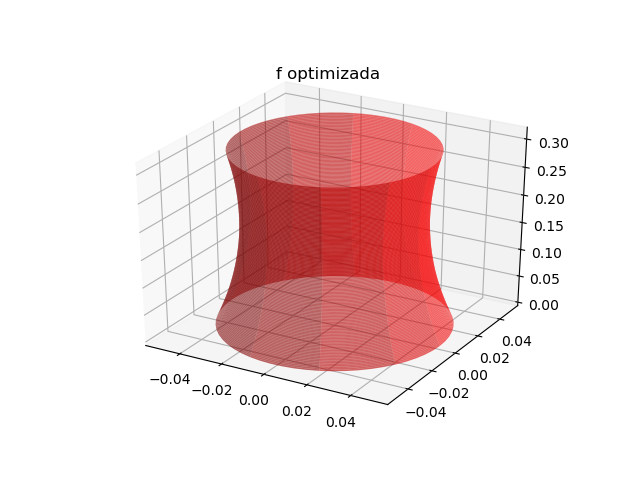


            Volume exterior       Volume interior       Diferencia
Antigo      1691.243936           1309.2623249          381.9816111
Optimizado  1692.31060325645      1309.26232490000      383.048278356446


In [26]:
# Sacamos das solucións do sistema anterior a parte que equivale
# aos coeficientes e descartamos os multiplicadores

# Descartamos a segunda solución por ter 'vertices' intermedios

def f_opt(x):
    return 0.300808405402620*x**2 - 0.114760651311685*x + 0.0494360052450000

# Facemos a representación gráfica das figuras
fig = plt.figure()

# Xeramos un vector de 800 números entre ó 0 e a altura
u = np.linspace(0, altura, 800)

# Xeramos un vector de 60 números entre ó 0 e ó 2 pi. E convertímolos nunha matriz
v = np.linspace(0, 2*np.pi, 60)
U, V = np.meshgrid(u, v)

# Representación de test(x)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_title('f optimizada')
xt = U
yt, zt = f_opt(xf)*np.cos(V), f_opt(xf)*np.sin(V)

ax.plot_surface(yt, zt, xt, alpha=0.6, color='red', rstride=6, cstride=6)

#Función para pasar de m3 a cm3
def tometers(x): 
    return x*10**6

print('''
            Volume exterior       Volume interior       Diferencia
Antigo      {}           {}          {}
Optimizado  {}      {}      {}'''.format(tometers(vol_ext), tometers(vol_int), tometers(vol_ext-vol_int),
                                                            tometers(sp.integrate(1*r, (r, 0, f_opt(z)), (Θ, 0, 2*np.pi), (z, 0, altura))),
                                                            tometers(sp.integrate(1*r, (r, 0, f_opt(z)-h), (Θ, 0, 2*np.pi), (z, 0, altura))),
                                                            tometers(sp.integrate(1*r, (r, 0, f_opt(z)), (Θ, 0, 2*np.pi), (z, 0, altura)) - 
                                                                     sp.integrate(1*r, (r, 0, f_opt(z)-h), (Θ, 0, 2*np.pi), (z, 0, altura)))))


 ___
 - **Fe de erratas**
 
Como podemos ver, o resultado da optimización dos coeficientes polo método de Lagrange non foi todo o efectivo que esperábamos, obtendo un volume 'optimizado' maior ao obtido na parte 5.1. Descoñecemos se o problema reside no sistema ou na aplicación do teorema, xa que o que 'busca' Lagrange son puntos mínimos, e o método no que o aplicamos aos coeficientes non parece ser o máis lóxico para esta tarefa, posto que o que buscamos e a optimización dun volume en dito polinomio.

Tras múltiples probas, o que podemos observar e que no primeiro cálculo do volume exterior, a función non é completamente paralela e equidistante á interior, na maioría dos puntos sí, pero cando se aproxima aos vérices vai facéndose máis pequena, estamos seguros de que este problema é o causante dos erros na optimización.
___
 Polinomio optimizado: 0.300808405402620\*x\*\*2 - 0.114760651311685\*x + 0.0494360052450000

 Polinomio antigo: -370976.546711899\*x\*\*8 + 468596.922704448\*x\*\*7 - 245206.270622495\*x\*\*6 + 69037.057198904\*x\*\*5 - 11349.2980784123\*x\*\*4 + 1102.62904510317\*x\*\*3 - 61.0439180756967\*x\*\*2 + 1.7349923914579\*x + 0.025993040285716
___

In [29]:
# Sabendo que a altura da tanxente é h_tan = 0.098872010494

sp.Eq(sp.diff(f(x),x).subs({x:h_tan}), 0)

Eq(0.197744020988*a + b, 0)